This jupyter notebook is used for the generation of two datasets that are used for network propagation. This one is a derivative from Guada's original jupyter notebook.

In [1]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pwd

/Users/wangrixin/Desktop/Project1/Code


In [3]:
%cd /Users/wangrixin/Desktop/Project1/

/Users/wangrixin/Desktop/Project1


In [4]:
#Loads original data
drug_to_protein = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/1_drug_to_protein.tsv', sep= '\t')
disease_to_protein = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/2_indication_to_protein.tsv', sep='\t')

In [5]:
#create dictionary dict_drug_gene, node_1 (drug) as keys and node_2 (protein) as value
dict_drug_gene = {}
for i in range(len(drug_to_protein)):
    entry = drug_to_protein.loc[i]
    if entry['node_1'] in dict_drug_gene:
        dict_drug_gene[entry['node_1']].append(entry['node_2'])
    else:
        dict_drug_gene[entry['node_1']] = [entry['node_2']]         
#create dictionary dict_drug_gene_sum: count the amount of value within each key
dict_drug_gene_sum = {}
for e in dict_drug_gene:
    dict_drug_gene_sum[e] = len(dict_drug_gene[e])

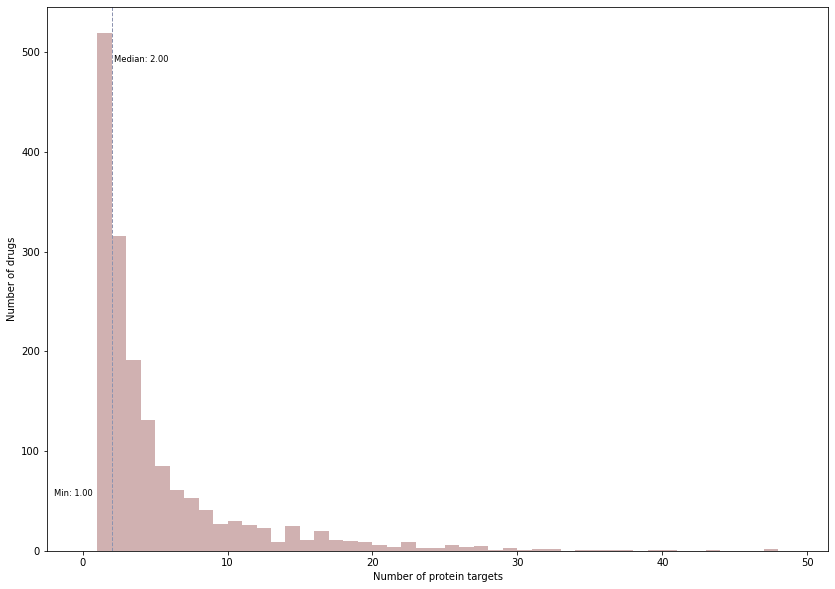

In [6]:
#Plot distribution of drug targets
fig = plt.figure(figsize = (14, 10))
plt.hist(dict_drug_gene_sum.values(), bins = range(50), color='#d0b1b1')
#plot line in average
plt.axvline(np.median(list(dict_drug_gene_sum.values())), color='#8c93b0', linewidth=1, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(list(dict_drug_gene_sum.values()))*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(list(dict_drug_gene_sum.values()))), size = 'small')
#Plot max value
# plt.text(np.sum(matrix, 0).max() - 10, max_ylim*0.1, 'Max: {:.2f}'.format(np.sum(matrix, 0).max()), size='small')
#Plot min value
plt.text(np.min(list(dict_drug_gene_sum.values())) - 3 , max_ylim*0.1, 'Min: {:.2f}'.format(np.min(list(dict_drug_gene_sum.values()))), size='small' )
plt.xlabel('Number of protein targets')
plt.ylabel('Number of drugs')
plt.show()

In [7]:
print('{} molecules not plotted - more than 50 targets'.format(np.sum(np.array(list(dict_drug_gene_sum.values())) > 50)))

5 molecules not plotted - more than 50 targets


In [8]:
np.array(list(dict_drug_gene_sum.values()))

array([297,  10,   8, ...,   1,   1,   1])

In [8]:
#create dictionary dict_disease_gene, node_1 (disease) as keys and node_2 (protein) as value
dict_disease_gene = {}
for i in range(len(disease_to_protein)):
    entry = disease_to_protein.loc[i]
    if entry['node_1'] in dict_disease_gene:
        dict_disease_gene[entry['node_1']].append(entry['node_2'])
    else:
        dict_disease_gene[entry['node_1']] = [entry['node_2']]
#create dictionary dict_disease_gene_sum, count the number of proteins involved in each disease            
dict_disease_gene_sum = {}
for e in dict_disease_gene:
    dict_disease_gene_sum[e] = len(dict_disease_gene[e])

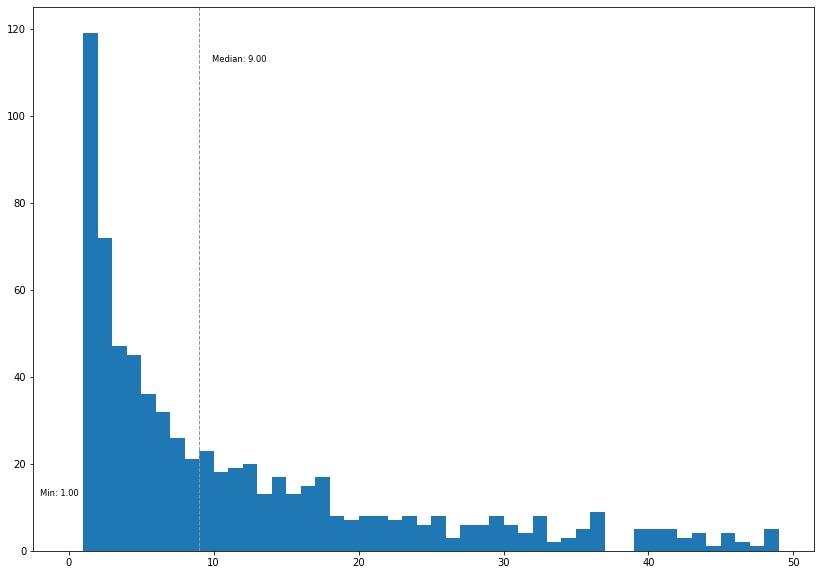

In [9]:
#Plot distribution of disease targets
fig = plt.figure(figsize = (14, 10))
plt.hist(dict_disease_gene_sum.values(), bins = range(50))
#plot line in average
plt.axvline(np.median(list(dict_disease_gene_sum.values())), color='#8c93b0', linewidth=1, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(list(dict_disease_gene_sum.values()))*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(list(dict_disease_gene_sum.values()))), size = 'small')
#Plot max value
# plt.text(np.sum(matrix, 0).max() - 10, max_ylim*0.1, 'Max: {:.2f}'.format(np.sum(matrix, 0).max()), size='small')
#Plot min value
plt.text(np.min(list(dict_disease_gene_sum.values())) - 3 , max_ylim*0.1, 'Min: {:.2f}'.format(np.min(list(dict_disease_gene_sum.values()))), size='small' )
plt.show()

In [10]:
print('{} molecules not plotted - more than 50 targets'.format(np.sum(np.array(list(dict_disease_gene_sum.values())) > 50)))

129 molecules not plotted - more than 50 targets


In [11]:
#Loads data - node_1 and node_2 correspond to Entrez IDs for genes
protein_to_protein = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/3_protein_to_protein.tsv', sep= '\t')

In [12]:
#joint node_1 and node_2 together, in total 17660 genes
genes_in_msi = list(set(protein_to_protein['node_1'].tolist()).union(set(protein_to_protein['node_2'].tolist())))
print(len(genes_in_msi))
print(genes_in_msi)

17660
[1, 2, 131076, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 131096, 34, 35, 36, 37, 38, 33, 40, 41, 39, 43, 131118, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 70, 71, 72, 81, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 103, 104, 105, 131177, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 196743, 196740, 140, 141, 142, 143, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 185, 186, 187, 189, 190, 191, 196, 197, 199, 202, 203, 204, 205, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 229, 230, 231, 238, 239, 240, 241, 242, 246, 247, 248, 249, 250, 251, 257, 258, 259, 262, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 196883, 278, 279, 277, 280, 283, 284, 285, 286, 287, 288, 290, 291, 292, 2

In [15]:
#create a dictionary dict_msi_entrez_id_name: gene id as keys, gene name as values
dict_msi_entrez_id_name = {}
for node_1, node_1_name in zip(protein_to_protein['node_1'], protein_to_protein['node_1_name']):
    dict_msi_entrez_id_name[node_1] = node_1_name
for node_2, node_2_name in zip(protein_to_protein['node_2'], protein_to_protein['node_2_name']):
    dict_msi_entrez_id_name[node_2] = node_2_name
len(dict_msi_entrez_id_name)

17660

In [16]:
def get_key (dict, value):

               return [k for k, v in dict.items() if v == value]
get_key(dict_msi_entrez_id_name,'TTN')

[7273]

In [17]:
dict_msi_entrez_id_name[29952]

'DPP7'

In [20]:
#dict_id_entrez is a dictionary, key-Index and value-Gene_ID
#dataset_dir = '.'
genes = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/genes.csv.gz')
dict_id_entrez = dict(zip(genes['Index'], genes['Gene_ID']))

In [21]:
#load compounds file
compounds = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/compounds_with_final_selections.csv.gz')
#only reserve food molecule
compounds = compounds[compounds['Is_Food'] == True]
#get rid of compounds whose STITCH_Gene_connections is na
compounds = compounds[~compounds['STITCH_Gene_connections'].isna()].reset_index(inplace=False, drop=True)

In [22]:
dict_entrez_name = {}
for entrez, name in zip(genes['Gene_ID'], genes['GSEA']):
    #if a Gene_ID contains "|", splite this Gene_ID by '|'
    #e_list is a list contains Gene_ID
    e_list = str(entrez).split('|')
    for e in e_list:
        #skip blank Gene_ID
        if e == 'nan':
            continue
        #name: GSEA: gene's abbreviation
        dict_entrez_name[int(e)] = name
dict_entrez_name    

{6647: 'SOD1',
 5213: 'PFKM',
 10013: 'HDAC6',
 10767: 'HBS1L',
 203100: 'HTRA4',
 84889: 'SLC7A3',
 6448: 'SGSH',
 9678: 'PHF14',
 6274: 'S100A3',
 403284: 'OR6C68',
 80745: 'THUMPD2',
 11133: 'KPTN',
 90233: 'ZNF551',
 64388: 'GREM2',
 79091: 'METTL22',
 4113: 'MAGEB2',
 53940: 'FTHL17',
 6418: 'SET',
 2212: 'FCGR2A',
 386680: 'KRTAP10-5',
 79576: 'NKAP',
 93487: 'MAPK1IP1L',
 57479: 'PRR12',
 57215: 'THAP11',
 203413: 'CXorf61',
 5740: 'PTGIS',
 100526693: nan,
 6041: 'RNASEL',
 139341: 'FUNDC1',
 147463: 'ANKRD29',
 399665: 'FAM102A',
 4817: 'NIT1',
 148423: 'C1orf52',
 55106: 'SLFN12',
 64080: 'RBKS',
 79819: 'WDR78',
 254048: 'UBN2',
 3588: 'IL10RB',
 342898: 'SYCN',
 5434: 'POLR2E',
 168544: 'ZNF467',
 56245: 'C21orf62',
 2568: 'GABRP',
 4793: 'NFKBIB',
 47: 'ACLY',
 4782: 'NFIC',
 58158: 'NEUROD4',
 56931: 'DUS3L',
 152078: nan,
 51226: 'COPZ2',
 641371: 'ACOT1',
 57482: 'KIAA1211',
 81669: 'CCNL2',
 4014: 'LOR',
 10509: 'SEMA4B',
 9063: 'PIAS2',
 353288: 'KRT26',
 51111: 'SUV4

In [22]:
#STITCH_Gene_connections over 700 means that the connection between food molecule and proteins has been experimentally verified
threshold_stitch = 700
dict_compound_id_genes = {}
for i in range(len(compounds)):
    entry = compounds.loc[i]
    gene_list = []
    for e in entry['STITCH_Gene_connections'].split('|'):
      #example of stitch_gene_connections: 16891:226|6315:160|10610:160|3333:160|12734:192|864:160|4144:226|11454:160|; how to illustrate it?
        if int(e.split(':')[1]) >= threshold_stitch:
            gene_list.append(int(e.split(':')[0]))
            if len(gene_list) > 0:
                dict_compound_id_genes[entry['ID']] = gene_list
            
#Dictionary of compounds (food molecules) and entrex gene IDs (targets), only reserve genes included in gene-in-msi
dict_compound_id_genes_entrez = {}
for e in dict_compound_id_genes:
    genes_l = []
    for ee in dict_compound_id_genes[e]:
        for a in str(dict_id_entrez[ee]).split('|'):
            if a == 'nan':
                continue
            else:
                if int(a) in genes_in_msi:
                    genes_l += [int(a)]
    dict_compound_id_genes_entrez[e] = genes_l   
    
#get rid of keys with zero interacted gene
dict_compound_id_genes_entrez_f = {}
for e in dict_compound_id_genes_entrez:
    if len(dict_compound_id_genes_entrez[e]) == 0:
        continue
    else:
        dict_compound_id_genes_entrez_f[e] = dict_compound_id_genes_entrez[e]

dict_compound_id_genes_entrez = dict_compound_id_genes_entrez_f   
dict_compound_id_genes_entrez_sum = {}
for e in dict_compound_id_genes_entrez:
    dict_compound_id_genes_entrez_sum[e] = len(dict_compound_id_genes_entrez[e])
dict_compound_id_genes_entrez 

{'FDB022665': [1160, 1152, 2593, 1158, 548596, 4151, 6535],
 'FDB010856': [10059, 7350, 7422, 79068, 4790, 5465, 6256, 5468, 5970],
 'FDB023054': [7422,
  7328,
  5241,
  367,
  4958,
  161742,
  25928,
  6272,
  10231,
  1588,
  10221,
  2353,
  115265,
  7057,
  2308,
  8650],
 'FDB020713': [1109,
  290,
  2697,
  6714,
  3291,
  8644,
  1645,
  5243,
  1646,
  4843,
  145482,
  3248,
  3383,
  5972,
  3290,
  4306,
  374875],
 'FDB005891': [3458,
  5743,
  1489,
  3383,
  834,
  5599,
  3576,
  3569,
  4780,
  3553,
  3565],
 'FDB020531': [840, 8795, 598, 6714, 1588, 596, 56616, 328, 836, 842, 4170],
 'FDB012603': [3320, 1576, 1543, 1950, 3791, 7153],
 'FDB008442': [1588],
 'FDB022634': [10170],
 'FDB013879': [6591],
 'FDB000939': [6667,
  4780,
  338,
  1956,
  842,
  27250,
  595,
  5728,
  2099,
  4790,
  4313,
  1026,
  3569,
  596,
  4953,
  8797,
  367,
  2950,
  4609,
  836,
  1021,
  1017,
  1950,
  5970],
 'FDB003787': [28981],
 'FDB014601': [590],
 'FDB011811': [3162, 4843

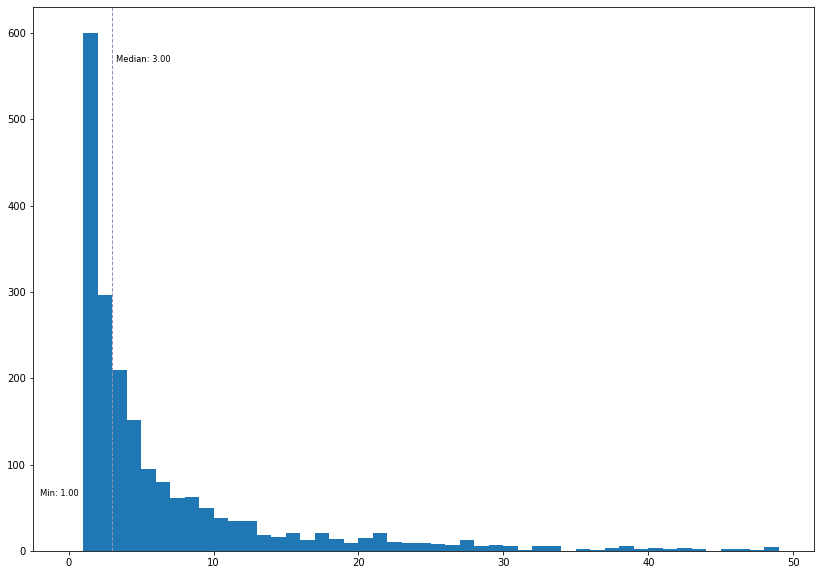

120 molecules not plotted - more than 50 targets


In [23]:
#Plot distribution of drug targets
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (14, 10))
plt.hist(dict_compound_id_genes_entrez_sum.values(), bins = range(50))
#plot line in average
plt.axvline(np.median(list(dict_compound_id_genes_entrez_sum.values())), color='#8c93b0', linewidth=1, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(list(dict_compound_id_genes_entrez_sum.values()))*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(list(dict_compound_id_genes_entrez_sum.values()))), size = 'small')
#Plot max value
# plt.text(np.sum(matrix, 0).max() - 10, max_ylim*0.1, 'Max: {:.2f}'.format(np.sum(matrix, 0).max()), size='small')
#Plot min value
plt.text(np.min(list(dict_disease_gene_sum.values())) - 3 , max_ylim*0.1, 'Min: {:.2f}'.format(np.min(list(dict_compound_id_genes_entrez_sum.values()))), size='small' )
plt.show()
print('{} molecules not plotted - more than 50 targets'.format(np.sum(np.array(list(dict_compound_id_genes_entrez_sum.values())) > 50)))

In [24]:
len(dict_compound_id_genes_entrez)

2100

Generating food molecule-to-protein.tsv

In [25]:
#Creates rows of file compound_to_protein (following format of msi drug_to_protein file)
rows = []
node_1_type = 'drug'
node_2_type = 'protein'

for i in range(len(compounds)):
    entry = compounds.loc[i]
    compound_id = entry['ID']
    node_1_name = entry['Name']
    if not compound_id in dict_compound_id_genes_entrez:
        continue
    genes = dict_compound_id_genes_entrez[compound_id]
    for g in genes:
        node_2_name = dict_msi_entrez_id_name[g]
        rows.append([compound_id, g, node_1_type, node_2_type, node_1_name, node_2_name])
        

In [26]:
outdir = osp.join('processed', 'msi')
os.makedirs(outdir, exist_ok = True)
pd.DataFrame(rows, columns = drug_to_protein.columns).to_csv(osp.join(outdir, '1_drug_to_protein.tsv'), sep = '\t', index=False)
entrez_ids_foodm = set(pd.DataFrame(rows, columns = drug_to_protein.columns)['node_2'].tolist())
food_to_protein = pd.DataFrame(rows, columns = drug_to_protein.columns)

Generating indication-to-protein.tsv

In [100]:
genes = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/genes.csv.gz')
dict_name_id = {}
for i in range(len(genes)):
    entry = genes.loc[i]
    names = str(entry['GSEA']).split('|')
    entrez_id = str(entry['Gene_ID'])
#     if entrez_id == 'nan':
#         continue
    for name in names:
        dict_name_id[name] = entrez_id.split('|')

In [128]:
dict_name_id['TOX4']

['9878']

In [36]:
#construct gene name - gene id data file based on gene.csv
rows = []
for name in dict_name_id.keys():
    gene_name = name
    gene_id = dict_name_id[name]
    for id in gene_id:
        id = int(id)
        rows.append([gene_name, id])
gene_name_id = pd.DataFrame(rows, columns = ['gene_name','gene_id'])
gene_name_id.to_csv(osp.join(outdir, 'gene_name_id.tsv'), sep = '\t',index = False)

In [159]:
%pwd

'/Users/wangrixin/Desktop/LUAD'

In [158]:
%cd /Users/wangrixin/Desktop/LUAD

/Users/wangrixin/Desktop/LUAD


In [176]:
#load colorectal cancer related genes
rc_genes = pd.read_csv('/Users/wangrixin/Desktop/LUAD/mutation_rate>0.1.csv')
rc_genes = rc_genes.dropna(subset=['Gene_id'])
# rc_genes = rc_genes[rc_genes['Score_gda']>0.3]

In [177]:
#Generate indication_to_protein.tsv. generated directly by mapping gene id in disgenent dataset and genes_in_msi
rows = []
node_1_type = 'indication'
node_2_type = 'protein'
entrez_genes_rc = []
node_1_name = 'LUAD'
indication = 'LUAD'

for gene in rc_genes['Gene_id'].drop_duplicates():
    gene = int(gene)
    if gene in genes_in_msi:
        node_2_name = dict_msi_entrez_id_name[gene]
        rows.append([indication, gene, node_1_type, node_2_type, node_1_name, node_2_name])
        entrez_genes_rc.append(gene)
outdir2 = osp.join('indication_to_protein_mapped_by_geneID', 'TCGA_mutation','0.1')
os.makedirs(outdir2, exist_ok = True)
pd.DataFrame(rows ,columns = disease_to_protein.columns).to_csv(osp.join(outdir2, '2_indication_to_protein.tsv'), sep = '\t', index=False)

In [25]:
#explore if genes targeted by RC have been targeted by other diseases in the MSI dataset
print('Protein overlap between indications and RC: {}'.format(len(set(disease_to_protein['node_2'].tolist()).intersection(entrez_genes_rc)) / len(entrez_genes_rc)))


Protein overlap between indications and RC: 0.6227544910179641


In [26]:
#explore if the genes targeted by food molecules have been targeted by drugs in the MSI dataset
print('Protein overlap between drugs and foodm: {}'.format(len(set(drug_to_protein['node_2'].tolist()).intersection(entrez_ids_foodm)) / len(entrez_ids_foodm)))

Protein overlap between drugs and foodm: 0.20273322791958437


##Calculate the percentage of protein (gene) overlap

Average overlap between drugs (1 vs all): 0.919340843348641


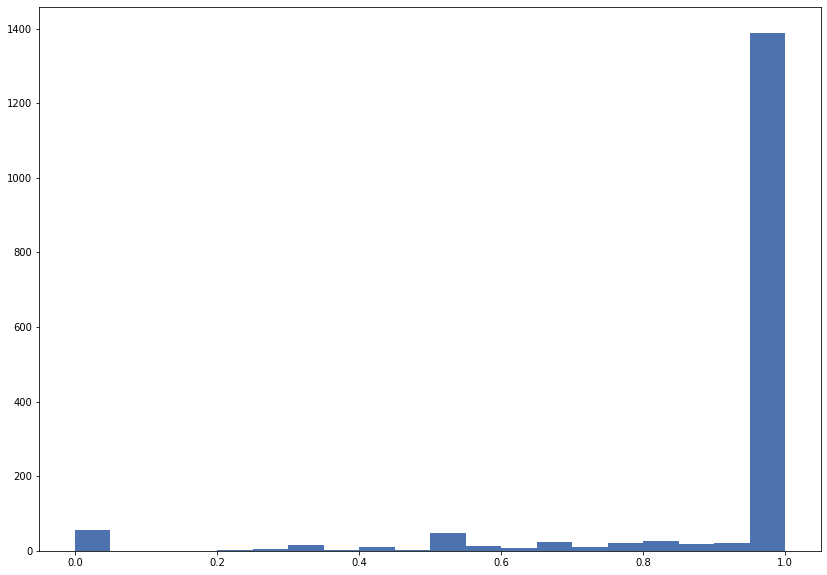

In [51]:
#For original drug_to_protein dataset
#for each drug, calculate "overlap between genes targeted by a specific drug and the rest of genes"/genes targeted by a specific drug
overlaps = []
for i in range(len(dict_drug_gene)):
    rdx_id = i
    rdx_node_1 = list(dict_drug_gene.keys())[rdx_id]
    node_1_genes = set(drug_to_protein[drug_to_protein['node_1'] == rdx_node_1]['node_2'].tolist())
    all_genes = set(drug_to_protein[drug_to_protein['node_1'] != rdx_node_1]['node_2'].tolist())
    overlaps.append(len(node_1_genes.intersection(all_genes)) / len(node_1_genes))
    
fig = plt.figure(figsize = (14, 10))
plt.hist(overlaps, bins = 20)    
print('Average overlap between drugs (1 vs all): {}'.format(np.mean(overlaps)))

In [28]:
np.median(np.array(overlaps)[np.array(overlaps) != 0])

1.0

Average overlap between food molecules and drugs: 0.5787098590410791


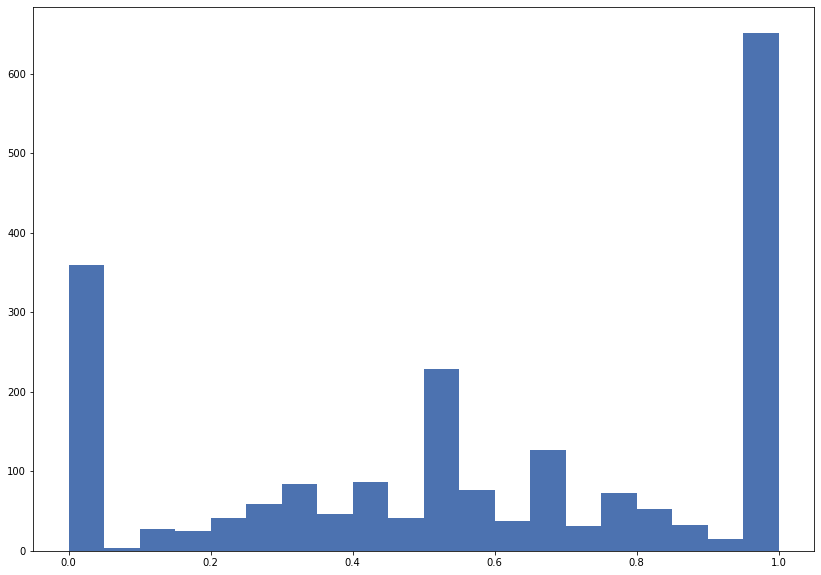

In [52]:
#For food molecules
#for each fm, calculate "overlap between genes targeted by a specific fm and the rest of genes"/genes targeted by a specific fm
overlaps_fm = []
for i in range(len(dict_compound_id_genes_entrez)):
    rdx_id = i
    rdx_node_1 = list(dict_compound_id_genes_entrez.keys())[rdx_id]
    node_1_genes = set(food_to_protein[food_to_protein['node_1'] == rdx_node_1]['node_2'].tolist())
    all_genes = set(drug_to_protein[drug_to_protein['node_1'] != rdx_node_1]['node_2'].tolist())
    overlaps_fm.append(len(node_1_genes.intersection(all_genes)) / len(node_1_genes))
    
fig = plt.figure(figsize = (14, 10))
plt.hist(overlaps_fm, bins = 20)    
print('Average overlap between food molecules and drugs: {}'.format(np.mean(overlaps_fm)))

In [30]:
np.median(np.array(overlaps_fm)[np.array(overlaps_fm) != 0])

0.6786796536796538

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f947a14b150>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f947a243910>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f947ab4c690>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f947ab41110>}

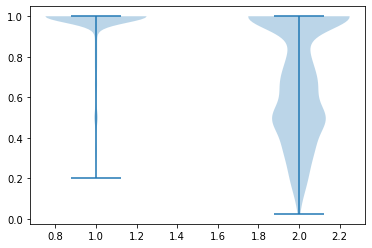

In [31]:
plt.violinplot([np.array(overlaps)[np.array(overlaps) != 0], np.array(overlaps_fm)[np.array(overlaps_fm) != 0]])

In [32]:
###Compare overlaps mean - t-test
!pip install scipy
from scipy.stats import ttest_ind
ttest_ind(overlaps, overlaps_fm , alternative='less')

Ttest_indResult(statistic=33.42492115254864, pvalue=1.0)

Explore overlap distribution for indications

Average overlap between diseases (1 vs all): 0.9480733913800892


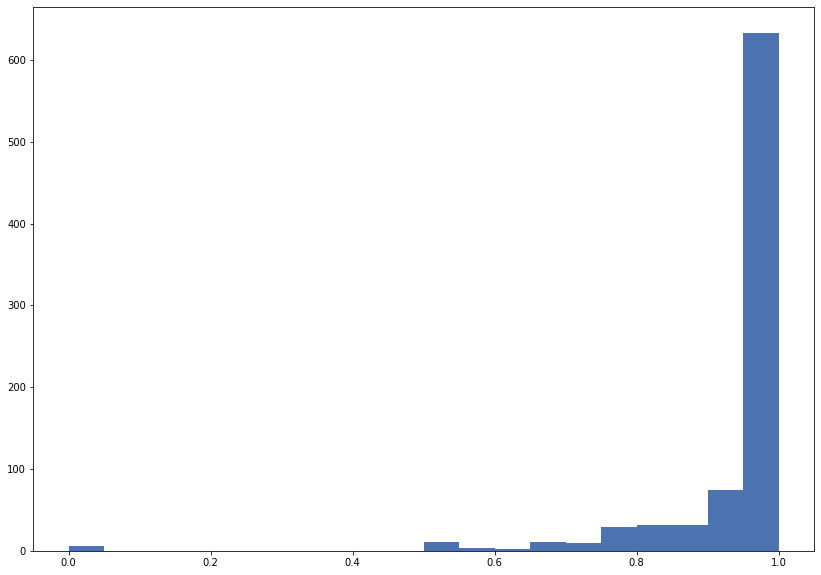

In [53]:
#For indications

overlaps = []
for i in range(len(dict_disease_gene)):
    rdx_id = i
    rdx_node_1 = list(dict_disease_gene.keys())[rdx_id]
    node_1_genes = set(disease_to_protein[disease_to_protein['node_1'] == rdx_node_1]['node_2'].tolist())
    all_genes = set(disease_to_protein[disease_to_protein['node_1'] != rdx_node_1]['node_2'].tolist())
    overlaps.append(len(node_1_genes.intersection(all_genes)) / len(node_1_genes))
    
fig = plt.figure(figsize = (14, 10))
plt.hist(overlaps, bins = 20)    
print('Average overlap between diseases (1 vs all): {}'.format(np.mean(overlaps)))

In [34]:
min(np.array(overlaps)[np.array(overlaps) != 0])

0.5

In [35]:
np.median(overlaps)

1.0

In [36]:
print('Protein overlap between indications and RC: {}'.format(len(set(disease_to_protein['node_2'].tolist()).intersection(entrez_genes_rc)) / len(entrez_genes_rc)))

Protein overlap between indications and RC: 0.6227544910179641


Check which are the diseases that RC overlaps with

In [37]:
dict_disease_id_name = dict(zip(disease_to_protein['node_1'], disease_to_protein['node_1_name']))
disease_with_overlap = []
for key in dict_disease_gene:
    if len(set(entrez_genes_rc).intersection(dict_disease_gene[key])) > 0:
        d_name = dict_disease_id_name[key]
        disease_with_overlap.append([d_name, len(set(entrez_genes_rc).intersection(dict_disease_gene[key]))])

In [38]:
disease_with_overlap = pd.DataFrame(disease_with_overlap).sort_values(by=1, ascending=False)
disease_with_overlap.columns = ['Disease name','Number of overlapped genes']
disease_with_overlap
# disease_with_overlap[disease_with_overlap[1] >1]

,Disease name,Number of overlapped genes
4,Colorectal Neoplasms,207
15,schizophrenia,78
9,Mammary Neoplasms,69
26,Prostatic Neoplasms,52
43,Stomach Neoplasms,52
...,...,...
374,Neuralgia,1
375,Medullary carcinoma of thyroid,1
377,Corneal Ulcer,1
380,"Carcinoma, Pancreatic Ductal",1


Plots

In [28]:
%pwd

'/Users/wangrixin/Desktop/Project1'

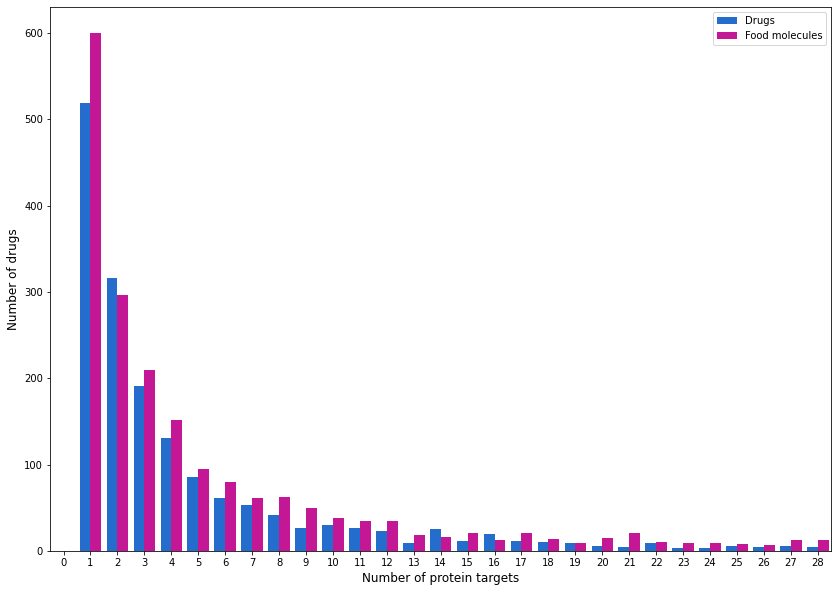

In [30]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins)+1, bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
plt.style.use('seaborn-deep')
#Plot distribution of drug targets
bins = range(30)


fig = plt.figure(figsize = (14, 10))

#Plot max value
# plt.text(np.sum(matrix, 0).max() - 10, max_ylim*0.1, 'Max: {:.2f}'.format(np.sum(matrix, 0).max()), size='small')
#Plot min value
# plt.text(np.min(list(dict_drug_gene_sum.values())) - 3 , max_ylim*0.1, 'Min: {:.2f}'.format(np.min(list(dict_drug_gene_sum.values()))), size='small' )
plt.xlabel('Number of protein targets', fontsize=12)
plt.ylabel('Number of drugs', fontsize = 12)

#Food molecules
# 256DCC
# plt.hist(dict_compound_id_genes_entrez_sum.values(), bins = range(30), color = '#256DCC', alpha = 1)

#plot line in average
# plt.axvline(np.median(list(dict_compound_id_genes_entrez_sum.values())), color='#8c93b0', linewidth=1, linestyle='dashed')
# min_ylim, max_ylim = plt.ylim()
# plt.text(np.median(list(dict_compound_id_genes_entrez_sum.values()))*1.1, max_ylim*0.9, 'Median food molecules: {:.2f}'.format(np.median(list(dict_compound_id_genes_entrez_sum.values()))), size = 'small')



#Drugs - MSI
plt.hist([list(dict_drug_gene_sum.values()), list(dict_compound_id_genes_entrez_sum.values())], bins = range(30), color=['#256DCC', '#C41795'], label = ['Drugs', 'Food molecules'])

#plot line in average
# plt.axvline(np.median(list(dict_drug_gene_sum.values())), color='#8c93b0', linewidth=1, linestyle='dashed')
# min_ylim, max_ylim = plt.ylim()
# plt.text(np.median(list(dict_drug_gene_sum.values()))*1.1, max_ylim*0.9, 'Median drugs: {:.2f}'.format(np.median(list(dict_drug_gene_sum.values()))), size = 'small')
bins_labels(bins, fontsize=10)
plt.legend(loc='upper right')
# plt.show()
plt.savefig('proteins target.jpg',dpi=600)


In [32]:
dict_drug_gene_sum

{'DB12010': 297,
 'DB01169': 10,
 'DB00459': 8,
 'DB06803': 1,
 'DB09462': 13,
 'DB01593': 116,
 'DB02709': 25,
 'DB06782': 1,
 'DB00746': 1,
 'DB01094': 4,
 'DB08827': 1,
 'DB00619': 8,
 'DB01268': 10,
 'DB06589': 12,
 'DB00397': 6,
 'DB00368': 12,
 'DB00960': 7,
 'DB00598': 5,
 'DB00852': 20,
 'DB00335': 2,
 'DB08985': 2,
 'DB00187': 1,
 'DB04855': 18,
 'DB01151': 21,
 'DB00726': 25,
 'DB00489': 3,
 'DB09068': 9,
 'DB01295': 4,
 'DB13345': 29,
 'clorprenaline': 2,
 'DB00521': 2,
 'DB00612': 2,
 'DB01136': 18,
 'DB01214': 2,
 'DB00221': 2,
 'DB00127': 6,
 'DB11273': 24,
 'DB00866': 4,
 'DB00571': 5,
 'DB00871': 3,
 'DB08807': 5,
 'DB00334': 47,
 'DB06262': 10,
 'DB01288': 3,
 'DB01359': 4,
 'DB05039': 2,
 'DB01182': 5,
 'DB01193': 2,
 'DB00540': 25,
 'DB01365': 9,
 'DB01291': 2,
 'DB09351': 2,
 'DB01118': 7,
 'DB00182': 17,
 'DB00555': 39,
 'DB00668': 12,
 'DB00408': 32,
 'DB01064': 8,
 'DB01407': 5,
 'DB01001': 3,
 'DB00264': 2,
 'DB00195': 2,
 'DB08808': 3,
 'DB00841': 6,
 'DB00938'

In [40]:
print('{} food molecules not plotted - more than 30 targets'.format(np.sum(np.array(list(dict_compound_id_genes_entrez_sum.values())) > 30)))
print('{} food molecules not plotted - more than 30 targets'.format(np.sum(np.array(list(dict_drug_gene_sum.values())) > 30)))

from scipy.stats import ttest_ind
print('Average drug targets: {}'.format(np.mean(list(dict_drug_gene_sum.values()))))
print('Average food molecule targets: {}'.format(np.mean(list(dict_compound_id_genes_entrez_sum.values()))))
drug_gene_sum = np.array(list(dict_drug_gene_sum.values()))
food_gene_sum = np.array(list(dict_compound_id_genes_entrez_sum.values()))
ttest_ind(drug_gene_sum[drug_gene_sum <= 50], food_gene_sum[food_gene_sum <= 50])

167 food molecules not plotted - more than 30 targets
18 food molecules not plotted - more than 30 targets
Average drug targets: 5.158338350391331
Average food molecule targets: 22.27047619047619


Ttest_indResult(statistic=-5.7766833038787615, pvalue=8.258712013325387e-09)

In [41]:
np.mean(food_gene_sum[food_gene_sum <= 50])

6.143939393939394

Text(30, 112.455, '# of genes in rt response: 702')

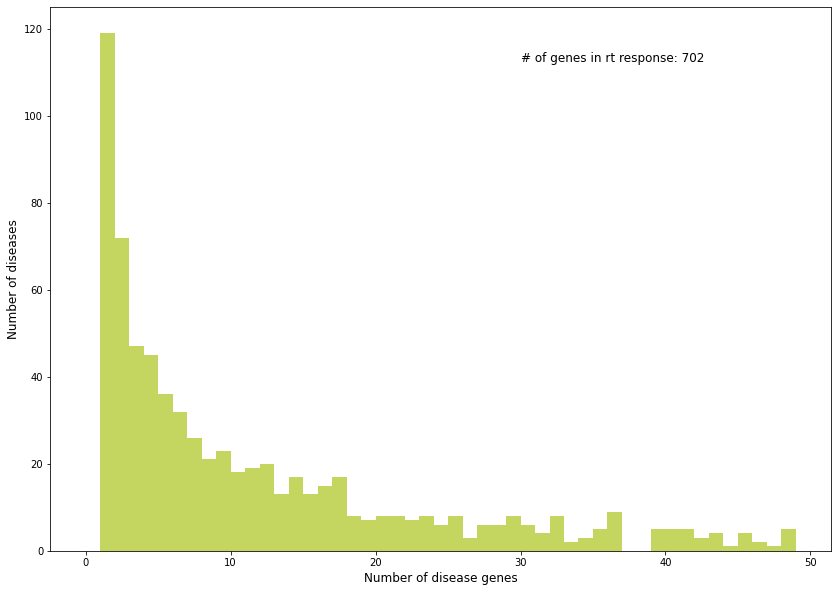

In [65]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins)+2, bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
# #Plot distribution of disease targets
bins = range(50)

# import matplotlib.pyplot as plt
# import numpy as np
fig = plt.figure(figsize = (14, 10))
plt.hist(dict_disease_gene_sum.values(), bins = bins, color = '#C5D660')
n_rectal = len(rc_genes['Gene'].tolist())

plt.xlabel('Number of disease genes', fontsize=12)
plt.ylabel('Number of diseases', fontsize = 12)



#plot line in average
# plt.axvline(30, color='#8c93b0', linewidth=1, linestyle='dashed')
min_ylim, max_ylim = plt.ylim()
plt.text(30, max_ylim*0.9, '# of genes in rt response: {}'.format(n_rectal), size = 'large')
#Plot max value
# plt.text(np.sum(matrix, 0).max() - 10, max_ylim*0.1, 'Max: {:.2f}'.format(np.sum(matrix, 0).max()), size='small')
#Plot min value
# plt.text(np.min(list(dict_disease_gene_sum.values())) - 3 , max_ylim*0.1, 'Min: {:.2f}'.format(np.min(list(dict_disease_gene_sum.values()))), size='small' )

# bins_labels(bins, fontsize=10)


In [43]:
print('{} molecules not plotted - more than 50 targets'.format(np.sum(np.array(list(dict_disease_gene_sum.values())) > 50)))

129 molecules not plotted - more than 50 targets


In [44]:
min(bins)

0

In [45]:
max(list(dict_disease_gene_sum.values()))

966

In [46]:
np.median(list(dict_disease_gene_sum.values()))

9.0

In [47]:
list(dict_disease_gene_sum.values())

[127,
 92,
 92,
 130,
 209,
 80,
 90,
 9,
 67,
 404,
 29,
 8,
 7,
 35,
 118,
 112,
 34,
 966,
 8,
 28,
 71,
 74,
 57,
 149,
 387,
 109,
 52,
 110,
 101,
 453,
 28,
 48,
 129,
 84,
 51,
 76,
 98,
 46,
 41,
 41,
 44,
 123,
 124,
 62,
 8,
 23,
 290,
 57,
 11,
 20,
 12,
 94,
 164,
 20,
 36,
 25,
 491,
 33,
 73,
 48,
 9,
 76,
 546,
 50,
 13,
 568,
 69,
 267,
 259,
 43,
 271,
 24,
 78,
 75,
 313,
 10,
 36,
 74,
 184,
 135,
 103,
 117,
 92,
 277,
 77,
 52,
 39,
 28,
 131,
 252,
 25,
 84,
 32,
 67,
 11,
 5,
 69,
 15,
 251,
 36,
 16,
 15,
 1,
 13,
 10,
 21,
 4,
 1,
 51,
 194,
 15,
 10,
 32,
 11,
 45,
 145,
 10,
 79,
 6,
 4,
 14,
 6,
 26,
 91,
 98,
 14,
 79,
 18,
 254,
 48,
 113,
 50,
 23,
 22,
 18,
 45,
 182,
 15,
 16,
 45,
 7,
 101,
 6,
 53,
 16,
 34,
 18,
 12,
 151,
 107,
 5,
 35,
 147,
 11,
 98,
 66,
 1,
 14,
 73,
 122,
 10,
 21,
 13,
 19,
 31,
 223,
 177,
 5,
 27,
 6,
 8,
 3,
 39,
 9,
 5,
 7,
 17,
 112,
 7,
 12,
 5,
 10,
 32,
 30,
 29,
 47,
 110,
 110,
 57,
 34,
 164,
 112,
 2,
 74,
 10,
 1